## CSCI316 Group Assignment 1

### **Importing Libraries and Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# import the train_test_split from model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree

#Transformer imports
from sklearn.base import BaseEstimator, TransformerMixin

#Logistic Regression imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

#KNN
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data.csv', low_memory=False)
#low_memory=false : there are columns with different datatypes. this ignores the error
print("Number of samples of data :%d" % len(data))
print(data)

Number of samples of data :855969
              id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0        1077501    1296599       5000         5000           4975.0   
1        1077430    1314167       2500         2500           2500.0   
2        1077175    1313524       2400         2400           2400.0   
3        1076863    1277178      10000        10000          10000.0   
4        1075358    1311748       3000         3000           3000.0   
...          ...        ...        ...          ...              ...   
855964  36371250   39102635      10000        10000          10000.0   
855965  36441262   39152692      24000        24000          24000.0   
855966  36271333   38982739      13000        13000          13000.0   
855967  36490806   39222577      12000        12000          12000.0   
855968  36271262   38982659      20000        20000          20000.0   

              term  int_rate  installment grade sub_grade  ... il_util  \
0        36 months     10.6

In [ ]:
print("Columns:")
for col in data.columns:
    print(col)

Columns:
id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
pymnt_plan
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
default_ind
Columns:
id
member_id
loan_amnt
funded_amnt
f

### **(a) Discover and Visualise Data**

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  int64  
 3   funded_amnt                  855969 non-null  int64  
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


**Correlation Heatmap**

<ipython-input-10-8118be559d39>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr()[['default_ind']].sort_values


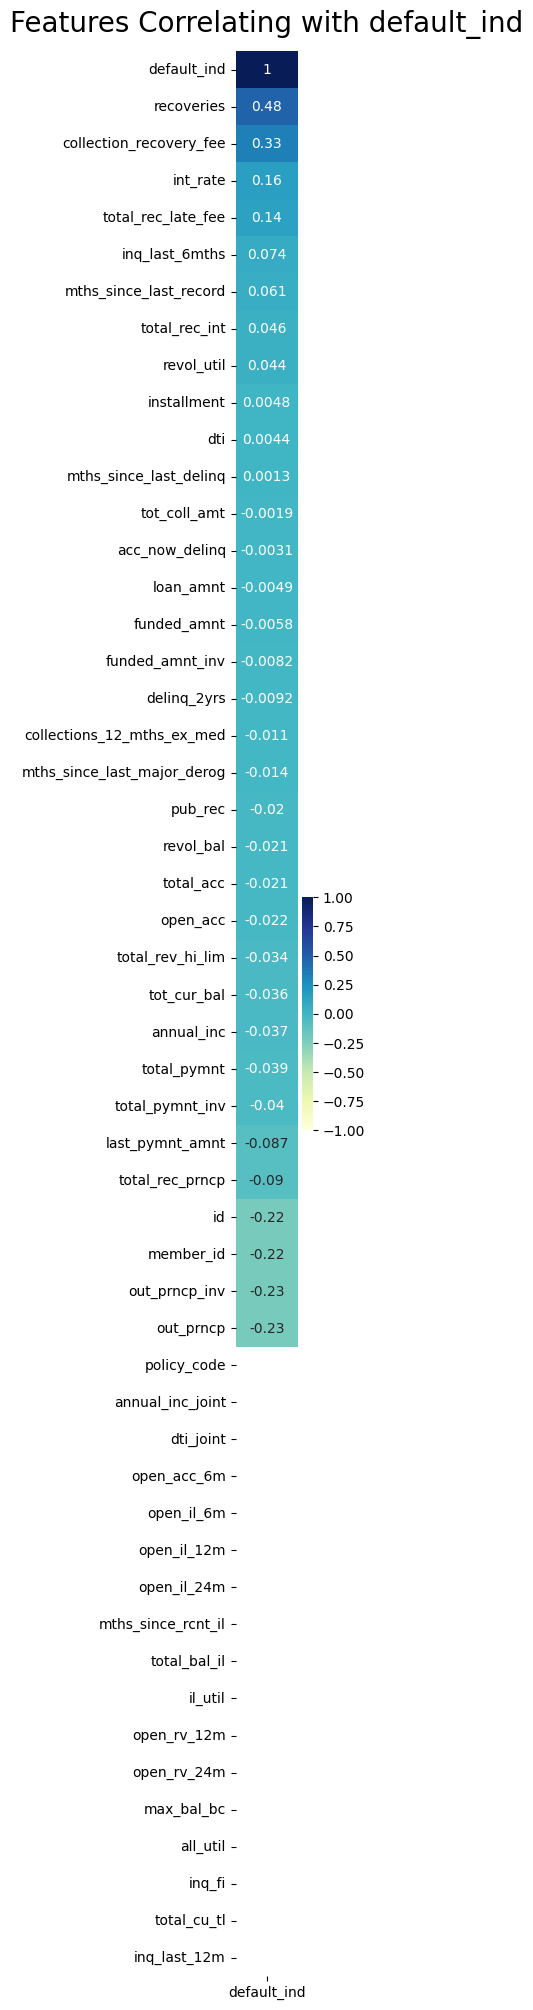

In [ ]:
# Visualize the correlation of all columns
plt.figure(figsize=(1,25))
heatmap = sns.heatmap(data.corr()[['default_ind']].sort_values
                     (by='default_ind', ascending=False), vmin=-1,
                      vmax=1, annot=True, cmap='YlGnBu')

heatmap.set_title('Features Correlating with default_ind',
                  fontdict={'fontsize':20}, pad=14);

**Selection of top 20 correlation columns**

In [ ]:
# 20 selected columns (highest correlation to default_ind)
df20 = pd.DataFrame(data,columns=['pub_rec','mths_since_last_major_derog','collections_12_mths_ex_med',
                               'delinq_2yrs','funded_amnt_inv','funded_amnt','loan_amnt',
                               'acc_now_delinq','tot_coll_amt','mths_since_last_delinq','dti',
                                'installment','revol_util','total_rec_int','mths_since_last_record',
                                'inq_last_6mths','total_rec_late_fee','int_rate','collection_recovery_fee',
                                'recoveries','default_ind'])

# return correlation matrix of df20
corr = df20.corr()
corr = corr['default_ind'].sort_values()
corr

pub_rec                       -0.019607
mths_since_last_major_derog   -0.013658
collections_12_mths_ex_med    -0.010650
delinq_2yrs                   -0.009186
funded_amnt_inv               -0.008209
funded_amnt                   -0.005797
loan_amnt                     -0.004907
acc_now_delinq                -0.003116
tot_coll_amt                  -0.001921
mths_since_last_delinq         0.001317
dti                            0.004429
installment                    0.004753
revol_util                     0.044497
total_rec_int                  0.046050
mths_since_last_record         0.061484
inq_last_6mths                 0.074407
total_rec_late_fee             0.140760
int_rate                       0.155037
collection_recovery_fee        0.330764
recoveries                     0.475738
default_ind                    1.000000
Name: default_ind, dtype: float64

**Visualization for correlation of 20 selected columns (Confusion Matrix)**

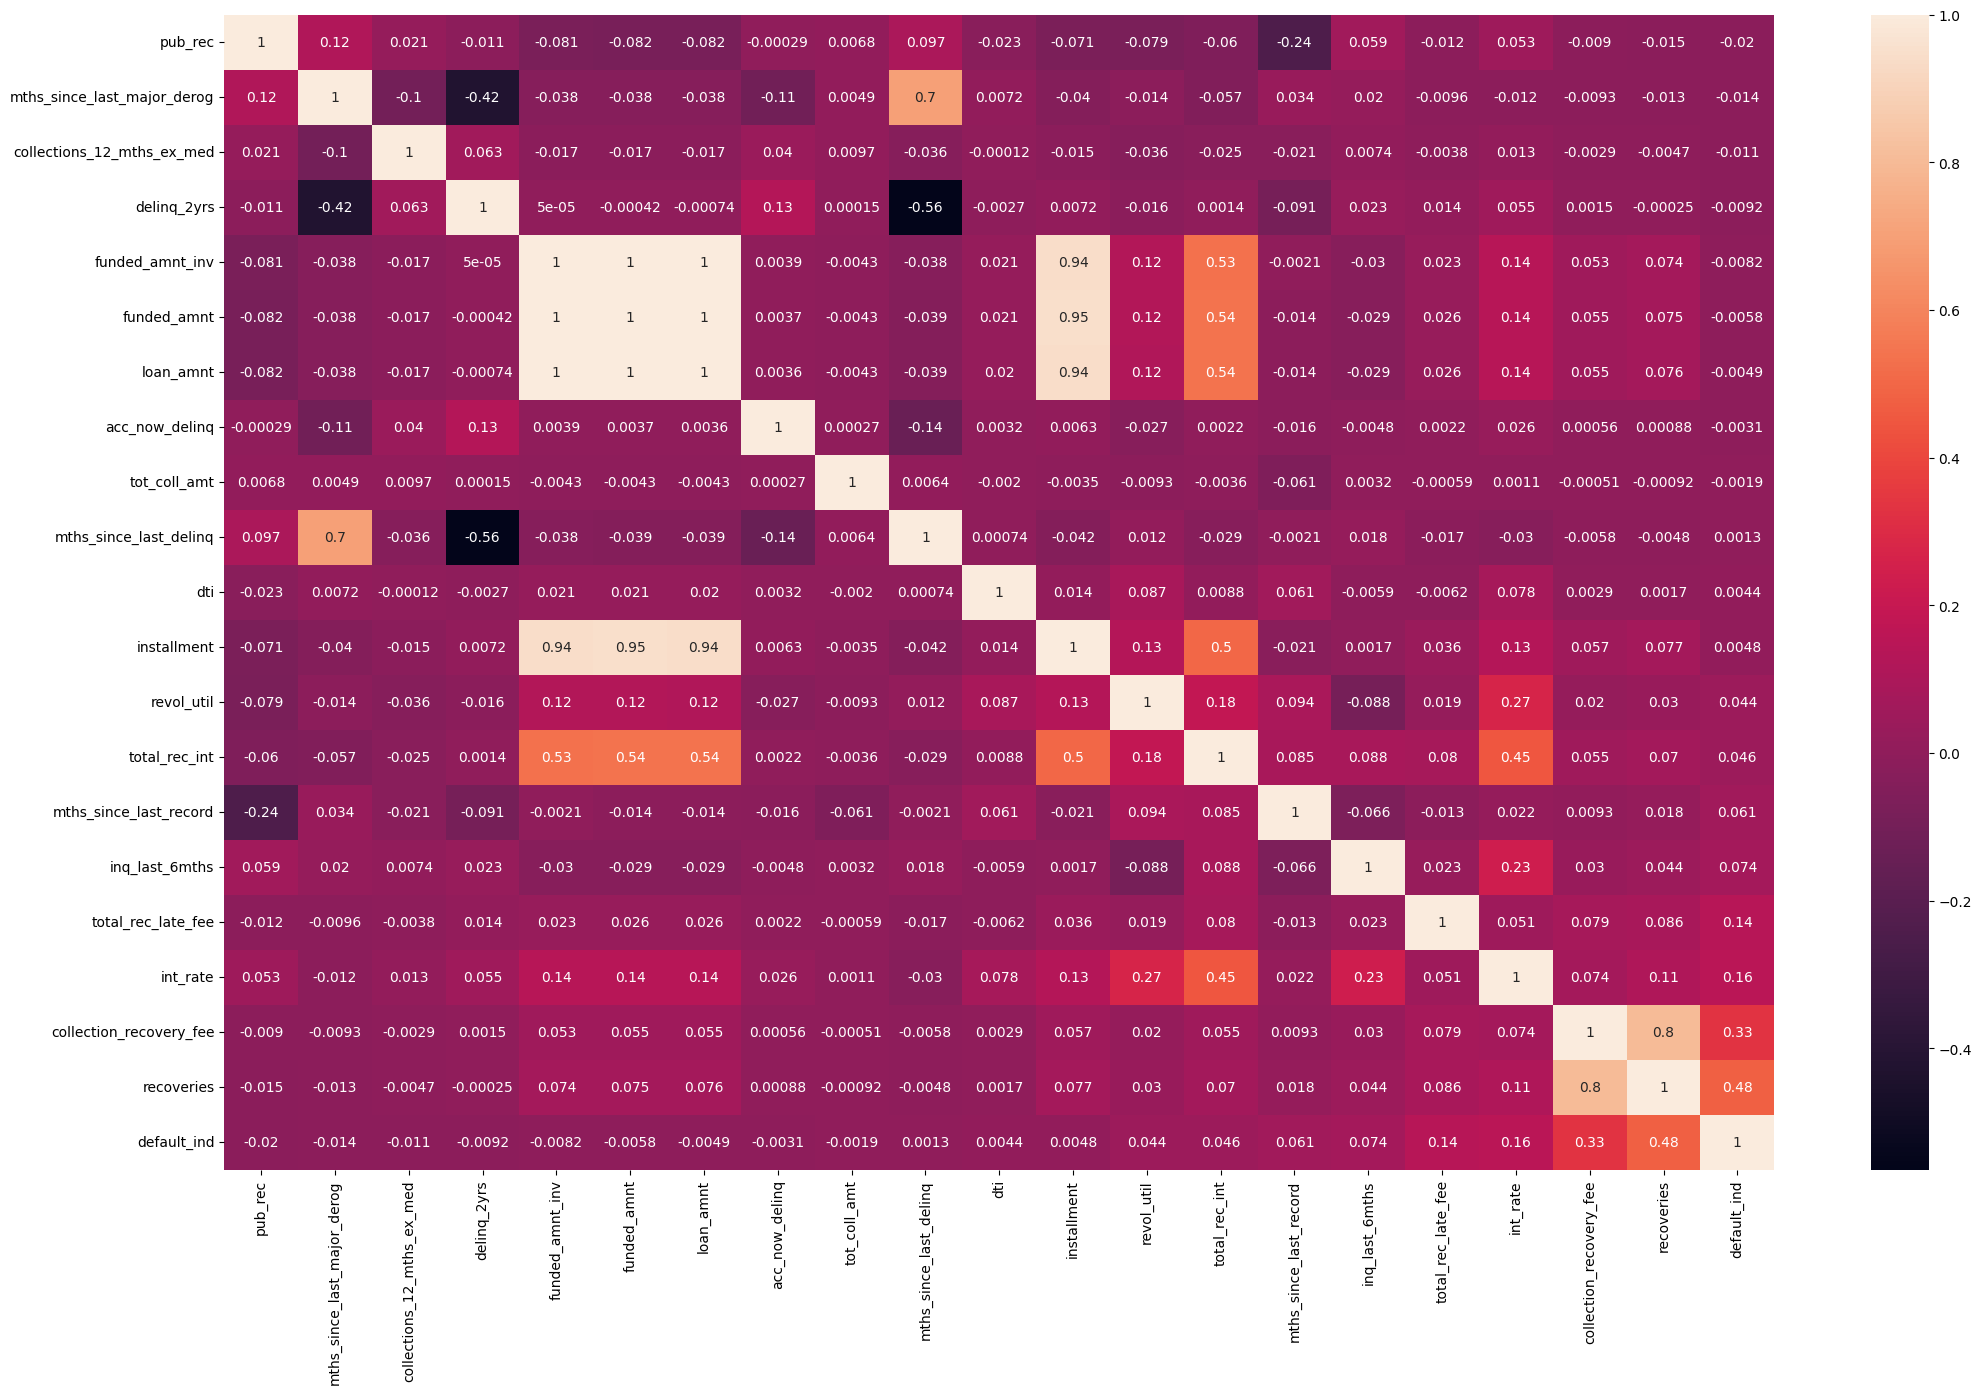

In [ ]:
# visualize the correlation of all columns in df20
plt.figure(figsize=(25,15))

# using heapmap to plot
sns.heatmap(df20.corr(), annot=True)

# show the plot
plt.show()

**Visualization for "recoveries" and "collection_recovery_fee" to "default_ind" (Scatterplot)**

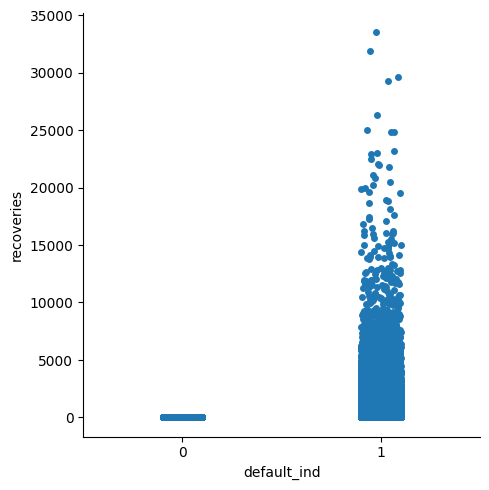

In [ ]:
sns.catplot(data=df20, x="default_ind", y="recoveries")

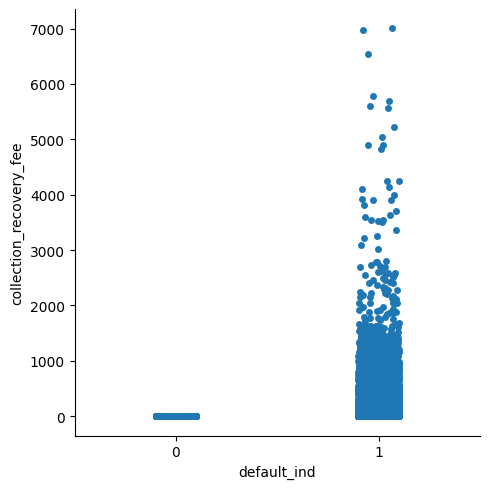

In [ ]:
sns.catplot(data=df20, x="default_ind", y="collection_recovery_fee")

**Visualization for count of "default_ind" (Bar Graph)**

In [ ]:
data.groupby('default_ind').size()

default_ind
0    809502
1     46467
dtype: int64

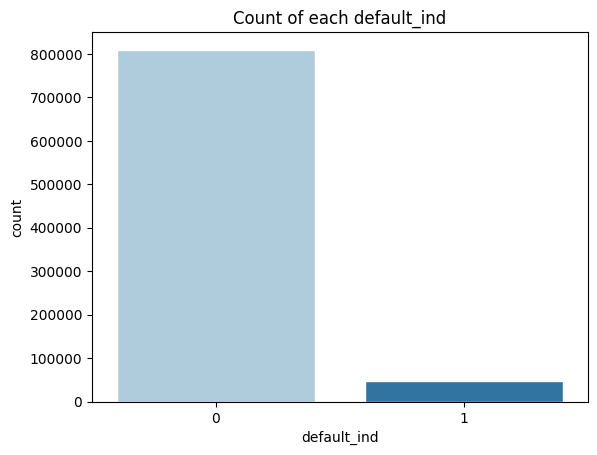

In [ ]:
# visualize the count of each 'default_ind' in data
plt.title('Count of each default_ind')
sns.set_style('whitegrid')
sns.countplot(x=data['default_ind'],palette='Paired')
plt.show()

**Visualization for percentage of each "default_ind" (Pie Chart)**

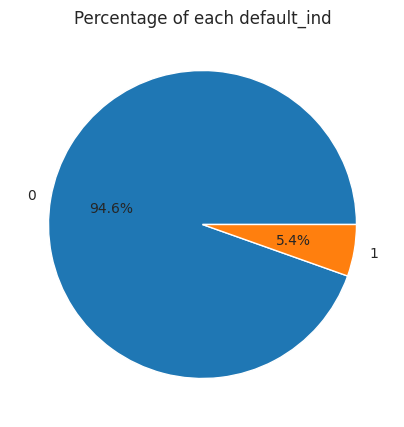

In [ ]:
plt.figure(figsize=(5, 5))
data['default_ind'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Percentage of each default_ind')
plt.show()

### **(b) Prepare the data for machine learning**

Filled rows with missing values with median value and check new correlation with default_ind

In [ ]:
# filling empty cells with median value
median_per_column = df20.median()

new_data = df20.fillna(median_per_column)
new_data.head()

,pub_rec,mths_since_last_major_derog,collections_12_mths_ex_med,delinq_2yrs,funded_amnt_inv,funded_amnt,loan_amnt,acc_now_delinq,tot_coll_amt,mths_since_last_delinq,...,installment,revol_util,total_rec_int,mths_since_last_record,inq_last_6mths,total_rec_late_fee,int_rate,collection_recovery_fee,recoveries,default_ind
0,0,44.0,0.0,0,4975.0,5000,5000,0,0.0,31.0,...,162.87,83.7,861.07,70.0,1,0.00,10.65,0.00,0.00,0
1,0,44.0,0.0,0,2500.0,2500,2500,0,0.0,31.0,...,59.83,9.4,435.17,70.0,5,0.00,15.27,1.11,117.08,1
2,0,44.0,0.0,0,2400.0,2400,2400,0,0.0,31.0,...,84.33,98.5,603.65,70.0,2,0.00,15.96,0.00,0.00,0
3,0,44.0,0.0,0,10000.0,10000,10000,0,0.0,35.0,...,339.31,21.0,2209.33,70.0,1,16.97,13.49,0.00,0.00,0
4,0,44.0,0.0,0,3000.0,3000,3000,0,0.0,38.0,...,67.79,53.9,1009.07,70.0,0,0.00,12.69,0.00,0.00,0


In [ ]:
#  returns the correlation matrix of the df to check that it hasn't deviated too much from original value
corr = new_data.corr()
corr = corr['default_ind'].sort_values()
corr

pub_rec                       -0.019607
collections_12_mths_ex_med    -0.010651
delinq_2yrs                   -0.009186
funded_amnt_inv               -0.008209
mths_since_last_major_derog   -0.006194
funded_amnt                   -0.005797
loan_amnt                     -0.004907
acc_now_delinq                -0.003116
tot_coll_amt                  -0.002445
mths_since_last_delinq        -0.001042
dti                            0.004429
installment                    0.004753
mths_since_last_record         0.021639
revol_util                     0.044479
total_rec_int                  0.046050
inq_last_6mths                 0.074407
total_rec_late_fee             0.140760
int_rate                       0.155037
collection_recovery_fee        0.330764
recoveries                     0.475738
default_ind                    1.000000
Name: default_ind, dtype: float64

**User-Defined Transformer**

In [ ]:
# feature engineering transformer
class AddNewFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, add_new_feature=True):
        self.add_new_feature = add_new_feature

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        new_data = X.copy()  # Create a copy of the input DataFrame

        if self.add_new_feature:
            # create a new feature called "recovery_performed," which takes the value 0 if no recoveries were performed and 1 if recoveries were performed.
            # this new feature will be based on the "recoveries" and "collection_recovery_fee" columns, where any value greater than 0 will indicate that a recovery has been performed.
            new_data['recovery_performed'] = ((new_data['recoveries'] > 0) | (new_data['collection_recovery_fee'] > 0)).astype(int)

        return new_data

### **(c) Select and train models**

In [ ]:
# Split the data into training and testing sets
# pre-transformed data
before_transform = AddNewFeatureTransformer(False)
bef_trans_data = before_transform.fit_transform(new_data)

# transformed data
after_transform = AddNewFeatureTransformer(True)
aft_trans_data = after_transform.fit_transform(new_data)

corr = aft_trans_data.corr()
corr = corr['default_ind'].sort_values()
corr

pub_rec                       -0.019607
collections_12_mths_ex_med    -0.010651
delinq_2yrs                   -0.009186
funded_amnt_inv               -0.008209
mths_since_last_major_derog   -0.006194
funded_amnt                   -0.005797
loan_amnt                     -0.004907
acc_now_delinq                -0.003116
tot_coll_amt                  -0.002445
mths_since_last_delinq        -0.001042
dti                            0.004429
installment                    0.004753
mths_since_last_record         0.021639
revol_util                     0.044479
total_rec_int                  0.046050
inq_last_6mths                 0.074407
total_rec_late_fee             0.140760
int_rate                       0.155037
collection_recovery_fee        0.330764
recoveries                     0.475738
recovery_performed             0.711742
default_ind                    1.000000
Name: default_ind, dtype: float64

In [ ]:
# x and y for pre-transformed df
x = bef_trans_data.drop(columns=['default_ind']).values
y = bef_trans_data['default_ind'].values
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)

# x1 and y1 for transformed df
x1 = aft_trans_data.drop(columns=['default_ind']).values
y1 = aft_trans_data['default_ind'].values
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1,test_size=0.2,random_state=0)


print("X training set count is : %.1f%% of total records" %
    (len(x_train)/len(x)*100))
print("X testing set count is : %.1f%% of total records\n" %
    (len(x_test)/len(x)*100))
print("Y training set count is : %.1f%% of total records" %
    (len(y_train)/len(x)*100))
print("Y testing set count is : %.1f%% of total records" %
    (len(y_test)/len(x)*100))

print("\n\nX1 training set count is : %.1f%% of total records" %
    (len(x_train)/len(x)*100))
print("X1 testing set count is : %.1f%% of total records\n" %
    (len(x_test)/len(x)*100))
print("Y1 training set count is : %.1f%% of total records" %
    (len(y_train)/len(x)*100))
print("Y1 testing set count is : %.1f%% of total records" %
    (len(y_test)/len(x)*100))

X training set count is : 80.0% of total records
X testing set count is : 20.0% of total records

Y training set count is : 80.0% of total records
Y testing set count is : 20.0% of total records


X1 training set count is : 80.0% of total records
X1 testing set count is : 20.0% of total records

Y1 training set count is : 80.0% of total records
Y1 testing set count is : 20.0% of total records


### Decision Tree Classifier

Using pre-transformed dataframe

In [ ]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = dtc.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = dtc.predict(x_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

# Detailed metrics using classification_report
print("\nClassification Report:", classification_report(y_test, y_pred))

Accuracy: 0.9500566608642826
Precision:  0.5367956687387206
Recall:  0.5766910814304179

Classification Report:               precision    recall  f1-score   support

           0       0.98      0.97      0.97    161910
           1       0.54      0.58      0.56      9284

    accuracy                           0.95    171194
   macro avg       0.76      0.77      0.76    171194
weighted avg       0.95      0.95      0.95    171194



Using transformed dataframe

In [ ]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = dtc.fit(x_train1,y_train1)

#Predict the response for test dataset
y_pred1 = dtc.predict(x_test1)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))
print("Precision: ", metrics.precision_score(y_test1, y_pred1))
print("Recall: ", metrics.recall_score(y_test1, y_pred1))

# Detailed metrics using classification_report
print("\nClassification Report:", classification_report(y_test1, y_pred1))

Accuracy: 0.9495484654836034
Precision:  0.5321474709331213
Recall:  0.5767987936234382

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97    161910
           1       0.53      0.58      0.55      9284

    accuracy                           0.95    171194
   macro avg       0.75      0.77      0.76    171194
weighted avg       0.95      0.95      0.95    171194



Fine-tuning on pre-transformed dataframe

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'], # function to measure quality of split
    'max_features': [None, 'sqrt', 'log2'] # num of features to consider when looking for best split
}

grid_search = GridSearchCV(dtc, param_grid)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

final_dtc = DecisionTreeClassifier(**best_params)
final_dtc.fit(x_train, y_train)
y_pred_f = final_dtc.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_f))
print("Best Parameters:", best_params)

Accuracy: 0.9514060072198792
Best Parameters: {'criterion': 'entropy', 'max_features': None}


Fine-tuning on transformed dataframe

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'], # function to measure quality of split
    'max_features': [None, 'sqrt', 'log2'] # num of features to consider when looking for best split
}

grid_search = GridSearchCV(dtc, param_grid)
grid_search.fit(x_train1, y_train1)
best_params = grid_search.best_params_

final_dtc = DecisionTreeClassifier(**best_params)
final_dtc.fit(x_train1, y_train1)
y_pred_f = final_dtc.predict(x_test1)

print("Accuracy:",metrics.accuracy_score(y_test1, y_pred_f))
print("Best Parameters:", best_params)

Accuracy: 0.9517506454665468
Best Parameters: {'criterion': 'entropy', 'max_features': None}


### Logistic Regression

Using pre-transformed dataframe

In [ ]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred))

Accuracy: 0.9734336483755271
Precision: 0.9866420057542129
Recall: 0.5171262386902198

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99    161910
           1       0.99      0.52      0.68      9284

    accuracy                           0.97    171194
   macro avg       0.98      0.76      0.83    171194
weighted avg       0.97      0.97      0.97    171194



Using transformed dataframe

In [ ]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train1, y_train1)
y_pred1 = logreg.predict(x_test1)

print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))
print("Precision:",metrics.precision_score(y_test1, y_pred1))
print("Recall:",metrics.recall_score(y_test1, y_pred1))

print("\nClassification Report:\n",metrics.classification_report(y_test1, y_pred1))

Accuracy: 0.9722011285442247
Precision: 0.9928120235242867
Recall: 0.490952175786299

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99    161910
           1       0.99      0.49      0.66      9284

    accuracy                           0.97    171194
   macro avg       0.98      0.75      0.82    171194
weighted avg       0.97      0.97      0.97    171194



Fine-tuning on pre-transformed dataframe

In [ ]:
param_grid = {
    'C': [0.1, 1.0, 10.0], # inverse regularization strength
    'penalty': ['l1', 'l2'], # regularization type
}

grid_search = GridSearchCV(logreg, param_grid)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

final_logreg = LogisticRegression(solver='liblinear', **best_params)
final_logreg.fit(x_train, y_train)
y_pred_f = final_logreg.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_f))
print("Best Parameters:", best_params)

Fine-tuning on transformed dataframe

In [ ]:
param_grid = {
    'C': [0.1, 1.0, 10.0], # inverse regularization strength
    'penalty': ['l1', 'l2'], # regularization type
}

grid_search = GridSearchCV(logreg, param_grid)
grid_search.fit(x_train1, y_train1)
best_params = grid_search.best_params_

final_logreg = LogisticRegression(solver='liblinear', **best_params)
final_logreg.fit(x_train1, y_train1)
y_pred_f = final_logreg.predict(x_test1)

print("Accuracy:",metrics.accuracy_score(y_test1, y_pred_f))
print("Best Parameters:", best_params)

### Random Forest Classifier

Using pre-transformed dataframe

In [ ]:
rfc = RandomForestClassifier(max_depth=3)

# Train Random Forest Classifier
rfc.fit(x_train, y_train)

# Predict the response for the test dataset
y_pred = rfc.predict(x_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Detailed metrics using classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9738542238629858
Precision: 1.0
Recall: 0.5178802240413615

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    161910
           1       1.00      0.52      0.68      9284

    accuracy                           0.97    171194
   macro avg       0.99      0.76      0.83    171194
weighted avg       0.97      0.97      0.97    171194



Using transformed dataframe

In [ ]:
rfc = RandomForestClassifier(max_depth=3)

# Train Random Forest Classifier
rfc.fit(x_train1, y_train1)

# Predict the response for the test dataset
y_pred1 = rfc.predict(x_test1)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test1, y_pred1))
print("Precision:", precision_score(y_test1, y_pred1))
print("Recall:", recall_score(y_test1, y_pred1))

# Detailed metrics using classification_report
print("\nClassification Report:")
print(classification_report(y_test1, y_pred1))

Accuracy: 0.9738775891678446
Precision: 1.0
Recall: 0.5183110728134425

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    161910
           1       1.00      0.52      0.68      9284

    accuracy                           0.97    171194
   macro avg       0.99      0.76      0.83    171194
weighted avg       0.97      0.97      0.97    171194



Fine-tuning on pre-transformed dataframe

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # split criterion for decision trees
}

grid_search = GridSearchCV(rfc, param_grid)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

final_rfc = RandomForestClassifier(max_depth=3, **best_params)
final_rfc.fit(x_train, y_train)
y_pred_f = final_rfc.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_f))
print("Best Parameters:", best_params)

Accuracy: 0.9738074932532682
Best Parameters: {'criterion': 'entropy'}


Fine-tuning on transformed dataframe

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # split criterion for decision trees
}

grid_search = GridSearchCV(rfc, param_grid)
grid_search.fit(x_train1, y_train1)
best_params = grid_search.best_params_

final_rfc = RandomForestClassifier(max_depth=3, **best_params)
final_rfc.fit(x_train1, y_train1)
y_pred_f = final_rfc.predict(x_test1)

print("Accuracy:",metrics.accuracy_score(y_test1, y_pred_f))
print("Best Parameters:", best_params)

Accuracy: 0.9738775891678446
Best Parameters: {'criterion': 'gini'}


### KNN (K-Nearest Neighbour)

Using pre-transformed dataframe

In [ ]:
# Create KNN classifier object with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train KNN Classifier
knn.fit(x_train, y_train)

# Predict the response for the test dataset
y_pred = knn.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.9695958970524667
Precision: 0.9746334652082849
Recall: 0.4510986643688065


Using transformed dataframe

In [ ]:
# Create KNN classifier object with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train KNN Classifier
knn.fit(x_train1, y_train1)

# Predict the response for the test dataset
y_pred1 = knn.predict(x_test1)

print("Accuracy:", accuracy_score(y_test1, y_pred1))
print("Precision:", precision_score(y_test1, y_pred1))
print("Recall:", recall_score(y_test1, y_pred1))

Accuracy: 0.9695958970524667
Precision: 0.9746334652082849
Recall: 0.4510986643688065


Fine-tuning on pre-transformed dataframe

In [ ]:
param_grid = {
    'weights': ['uniform', 'distance'],  # weighting scheme for neighbors
    'p': [1, 2],  # power parameter for the Minkowski distance metric (1: Manhattan, 2: Euclidean)
}

grid_search = GridSearchCV(knn, param_grid)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

final_knn = KNeighborsClassifier(n_neighbors=5, **best_params)
final_knn.fit(x_train, y_train)
y_pred_f = final_knn.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_f))
print("Best Parameters:", best_params)

Fine-tuning on transformed dataframe

In [ ]:
param_grid = {
    'weights': ['uniform', 'distance'],  # weighting scheme for neighbors
    'p': [1, 2],  # power parameter for the Minkowski distance metric (1: Manhattan, 2: Euclidean)
}

grid_search = GridSearchCV(knn, param_grid)
grid_search.fit(x_train1, y_train1)
best_params = grid_search.best_params_

final_knn = KNeighborsClassifier(n_neighbors=5, **best_params)
final_knn.fit(x_train1, y_train1)
y_pred_f = final_knn.predict(x_test1)

print("Accuracy:",metrics.accuracy_score(y_test1, y_pred_f))
print("Best Parameters:", best_params)